## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
print(data.isna().sum().sum())
print(data.duplicated().sum())

0
153


count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

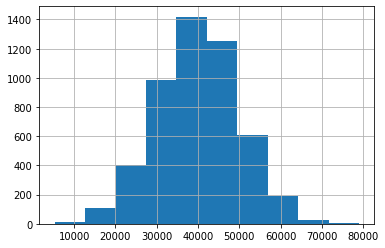

In [5]:
data['Зарплата'].hist()
data['Зарплата'].describe()

In [6]:
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

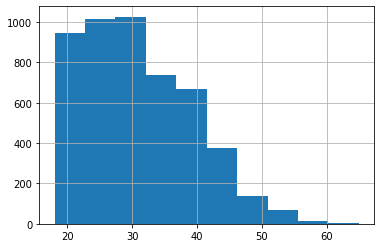

In [7]:
data['Возраст'].hist()

In [8]:
data['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

Файл загружен и изучен:5 столбцов с цифровыми значениями в 5000 строк. Пропуски в данных отсутствуют,есть дуликаты,но так как при данной информации они возможны, из данных их не удаляем.
Значения всех столбцов равномерно распределены, больщая разница минимальной и максимальной зарабатной планы(от 5.3 тыс.руб. до 79 тыс. руб.),пол распределен в данных в равном количество,преолбадающее количество детей в семье от 0 до 2.

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Ответ:** результат не изменится

**Обоснование:** Если умножить матрицу признаков на обратную матрицу, и в итоге качество модели не пострадает,так же возможно восстановить исходную матрицу признаков с применением шифрования.
Создается матрица с размерами (4,5),данные матрицы делятся на матрицу признаков и вектор целевых признаков, для преобразованя данных используется рандомная обратимая матрица размером (4,4),обучается модель № 1 на исходных данных,модель № 2 на измененных данных, у каждой модели подсчитывается метрика r2 для наблюдения за изменением показателя навыявление изменения качества модели линейной регрессии. Проверка показывает,что качество модели не изменится.

## 3. Алгоритм преобразования

In [1]:
matrix = np.random.sample((4,5))

NameError: name 'np' is not defined

#### 1.Деление данных на матрицу признаков и вектор целевых признаков

In [10]:
features = matrix[:,:4]
target = matrix[:,4:]

#### 2.Деление выборки на обучающую и тестовую

In [11]:
features_train1,features_test1,target_train1,target_test1 = train_test_split(features,target,test_size=0.33, random_state=42)

#### 3.Cоздание модели и метрики на исходных данных

In [12]:
model_1 = LinearRegression()
model_1.fit(features_train1,target_train1)
predictions1 = model_1.predict(features_test1)
print(r2_score(target_test1,predictions1))

-9.160336545902252


#### 4.Создание рандомной матрицы

In [13]:
example = np.random.sample((4,4))

#### 5.Проверка единичной матрицой

In [14]:
example @ np.linalg.inv(example)

array([[ 1.00000000e+00, -1.70152681e-16,  7.68633620e-18,
         1.43884559e-16],
       [-1.78021426e-16,  1.00000000e+00,  2.65440572e-16,
         6.51306591e-17],
       [-1.47514004e-16, -8.05550870e-17,  1.00000000e+00,
        -6.43896677e-18],
       [ 1.52974044e-16,  1.24972463e-16,  4.11105772e-16,
         1.00000000e+00]])

#### 6. Измененные матрицы данных

In [15]:
features_train2 = features_train1.dot(example)
features_test2 = features_test1.dot(example)

#### 7.Создание модели и метрики на новой матрице данных

In [16]:
model_2 = LinearRegression()
model_2.fit(features_train2,target_train1)
predictions2 = model_2.predict(features_test2)
print(r2_score(target_test1,predictions2))

-13.523806342036295


**Обоснование**

Расписан алгоритм преобразования данных, а именно:
Создана матрица с размерами (4,5),данные матрицы были поделены на матрицу признаков и вектор целевых признаков, для преобразованя данных была использована рандомная обратимая матрица размером (4,4),обучена модель № 1 на исходных данных,модель № 2 на измененных данных, у каждой модели подсчитана метрика r2 для наблюдения за изменением показателя навыявление изменения качества модели линейной регрессии. Проверка показала,что качество модели не изменилось,есть присутствие погрешности в метрике и единичной матрице,так как изначально значения не были переведены в целочисленные.

### 4. Проверка алгоритма

### Модель 1

In [17]:
#деление на матрицу признаков и вектор целевых признаков
features_array = data.drop(['Страховые выплаты'],axis = 1)
target_array = data['Страховые выплаты']

In [18]:
#деление на выборки 
features_train,features_test,target_train,target_test = train_test_split(features_array,target_array,test_size=0.33, random_state=42)

In [19]:
#обучение модели 1 и проверка качества метрикой r2
model_1 = LinearRegression()
model_1.fit(features_train,target_train)
predictions1 = model_1.predict(features_test)
print(r2_score(target_test,predictions1))

0.41541402565474317


### Модель 2

In [20]:
class LinRegression:
    def fit(self,features_train,target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)),features_train), axis=1)
        y = target_train
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self,test_features):
        return test_features.dot(self.w) + self.w0

In [22]:
#обучение модели 2 и проверка качества метрикой r2
model2 = LinRegression()
model2.fit(features_train,target_train)
predictions = model2.predict(features_test)
print(r2_score(target_test,predictions))

0.41541402565474983


### Модель 3

In [23]:
# создаём рандомную матрицу
example = np.random.sample((4,4))

In [24]:
example @ np.linalg.inv(example) #ПРОВЕРКА ЕДИНИЧНОЙ

array([[ 1.00000000e+00,  1.32544899e-16,  4.13132879e-16,
         7.57362197e-18],
       [-9.72975707e-17,  1.00000000e+00,  8.95921073e-17,
         7.18480610e-18],
       [-8.04025528e-16, -6.18761052e-17,  1.00000000e+00,
         1.18610453e-16],
       [ 1.15288010e-16, -2.84232404e-17, -3.27625561e-17,
         1.00000000e+00]])

In [25]:
# создаём новые данные
new_features_train = features_train.dot(example)
new_features_test = features_test.dot(example)

In [26]:
# создаём модель с новой матриццей и получаем ту же самую метрику.
model3 = LinearRegression()
model3.fit(new_features_train,target_train)
predictions3=model3.predict(new_features_test)
print(r2_score(target_test,predictions3))

0.41541402565563423


Данные из датафрейма преобразованы в матрицу,к ним применен алгоритм преобразования из п.3. Создан класс для расчета алгоритма линейной регрессии. Модель обучена и расчитана оценка качества модели r2.
Обучено три модели: одна модель - с на исходных данных, вторая и третья  модель - на изменённых данных.

# Вывод

Файл загружен и изучен:5 столбцов с цифровыми значениями в 5000 строк. Пропуски в данных отсутствуют,есть дуликаты,но так как при данной информации они возможны, из данных их не удаляем.
Значения всех столбцов равномерно распределены, больщая разница минимальной и максимальной зарабатной планы(от 5.3 тыс.руб. до 79 тыс. руб.),пол распределен в данных в равном количество,преолбадающее количество детей в семье от 0 до 2.

Если умножить матрицу признаков на обратную матрицу, и в итоге качество модели не пострадает,так же возможно восстановить исходную матрицу признаков с применением шифрования.

Расписан алгоритм преобразования данных, а именно:
Создана матрица с размерами (4,5),данные матрицы были поделены на матрицу признаков и вектор целевых признаков, для преобразованя данных была использована рандомная обратимая матрица размером (4,4),обучена модель № 1 на исходных данных,модель № 2 на измененных данных, у каждой модели подсчитана метрика r2 для наблюдения за изменением показателя навыявление изменения качества модели линейной регрессии. Проверка показала,что качество модели не изменилось,есть присутствие погрешности в метрике и единичной матрице,так как изначально значения не были переведены в целочисленные.


Данные из датафрейма преобразовыны в матрицу,к ним применен алгоритм преобразования из п.3. Создан класс для расчета алгоритма линейной регрессии. Модель обучена и расчитана оценка качества модели r2. Обучено две модели: одна модель - с на исходных данных, вторая модель - на изменённых данных.